# Problem Statement

Health Insurance Lead Prediction
Your Client FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.

Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

Now the company needs your help in building a model to predict whether the person will be interested in their proposed Health plan/policy given the information about:

Demographics (city, age, region etc.)
Information regarding holding policies of the customer
Recommended Policy Information

# Table of Content

Step 1: Importing the Relevant Libraries

Step 2: Data Inspection

Step 3: Data Cleaning

Step 4: Exploratory Data Analysis

Step 5: Building Model

## Importing the Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## Data Inspection

In [2]:
train = pd.read_csv(r"C:\Users\KOWSHIK REDDY\Desktop\Git Hub\train.csv",encoding="latin")

In [3]:
train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


        * we have Two data sets Train and Test.
        * in Training data sets we have 50882 rows x 14 columns.
        * In Testing Data Set we have 21805 rows x 13 columns.

In [4]:
# Ratio of null valves
train.isnull().sum() / train.shape[0]*100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

        * we have 22.976691 of missing valves in Health Indicator.
        * we have 39.799929 of missing valves in Holding_Policy_Duration.
        * we have 39.799929 of missing valves in Holding_Policy_Type.

In [5]:
train.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

## Data Cleaning

In [6]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

Why missing values treatment is required? Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [7]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

        * here,Health Indicator is a categorical feature
        * here,Holding_Policy_Duration is a numerical feature
        * here,Holding_Policy_Type is a numerical feature

        * firstly , i replace null valves in missing data.

In [8]:
# it is a categorical data. so i used to replace with mode.
train["Health Indicator"].fillna(train["Health Indicator"].mode()[0],inplace=True)

In [9]:
# remain both are numerical data. so i used to fill with mean.
train["Holding_Policy_Duration"].fillna(train["Holding_Policy_Duration"].mode()[0],inplace=True)
train["Holding_Policy_Type"].fillna(train["Holding_Policy_Type"].mode()[0],inplace=True)

In [10]:
train.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

        * Here,we have special char in data set.
        * so i want to replace him.

In [11]:
# converting dtype to string 
train["Holding_Policy_Duration"] = train["Holding_Policy_Duration"].astype("str")
# removing
train["Holding_Policy_Duration"] = train["Holding_Policy_Duration"].str.replace("+"," ")

        *Now, i convert Holding_Policy_Duration and Holding_Policy_Type into int format.

In [12]:
# float to int data type.
train["Holding_Policy_Duration"] = train["Holding_Policy_Duration"].astype(dtype=float)
train["Holding_Policy_Duration"] = train["Holding_Policy_Duration"].astype(dtype=int)
train["Holding_Policy_Type"] = train["Holding_Policy_Type"].astype(dtype=int)
train["Reco_Policy_Premium"] = train["Reco_Policy_Premium"].astype(dtype=int) 
train["City_Code"] = train["City_Code"].astype(dtype=str)

In [13]:
train.dtypes

ID                          int64
City_Code                  object
Region_Code                 int64
Accomodation_Type          object
Reco_Insurance_Type        object
Upper_Age                   int64
Lower_Age                   int64
Is_Spouse                  object
Health Indicator           object
Holding_Policy_Duration     int32
Holding_Policy_Type         int32
Reco_Policy_Cat             int64
Reco_Policy_Premium         int32
Response                    int64
dtype: object

## Outlier detection 

<AxesSubplot:xlabel='Holding_Policy_Duration'>

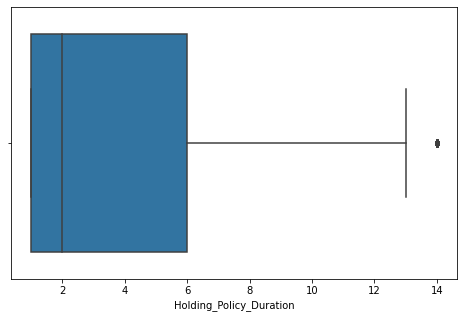

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot('Holding_Policy_Duration',data=train)

        * here identify the outliers in data set.
        * so want to remove outliers in data set.

In [15]:
# Removing skewness in LoanAmount variable by log transformation
train["Holding_Policy_Duration"] = np.log(train["Holding_Policy_Duration"])

<AxesSubplot:xlabel='Holding_Policy_Duration'>

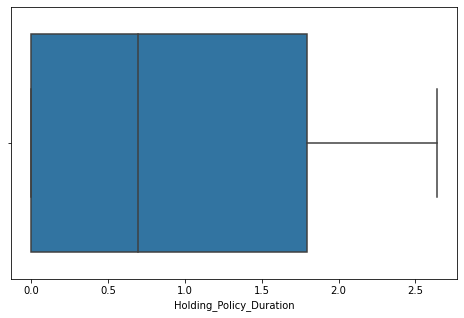

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot('Holding_Policy_Duration',data=train)

<AxesSubplot:xlabel='Holding_Policy_Type'>

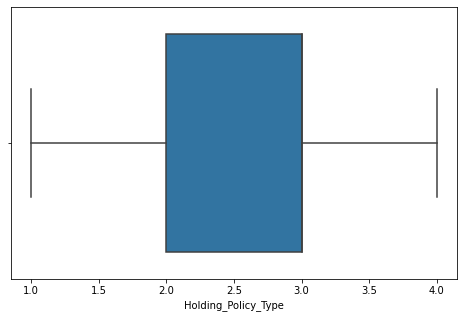

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot('Holding_Policy_Type',data=train)

# here we dont have any outliers in data set.

In [18]:
# finally, train data set
train.shape

(50882, 14)

## Inconsistent type : like Capitalization 

    * if your data has some inconsistence format.
    * we interpret the data because machine does not understands the formats.
    * here i convert to lower case letters.

In [19]:
# train data
train["City_Code"] = train["City_Code"].str.lower()
train["Accomodation_Type"] = train["Accomodation_Type"].str.lower()
train["Reco_Insurance_Type"] = train["Reco_Insurance_Type"].str.lower()
train["Is_Spouse"] = train["Is_Spouse"].str.lower()
train["Health Indicator"] = train["Health Indicator"].str.lower()

In [20]:
train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,c3,3213,rented,individual,36,36,no,x1,2.639057,3,22,11628,0
1,2,c5,1117,owned,joint,75,22,no,x2,0.000000,3,22,30510,0
2,3,c5,3732,owned,individual,32,32,no,x1,0.000000,1,19,7450,1
3,4,c24,4378,owned,joint,52,48,no,x1,2.639057,3,19,17780,0
4,5,c8,2190,rented,individual,44,44,no,x2,1.098612,1,16,10404,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,c4,845,rented,individual,22,22,no,x3,0.000000,3,18,7704,0
50878,50879,c5,4188,rented,individual,27,27,no,x3,1.945910,3,4,5408,0
50879,50880,c1,442,rented,individual,63,63,no,x2,2.639057,1,12,11374,0
50880,50881,c1,4,owned,joint,71,49,no,x2,0.693147,2,16,28179,1


# Exploratory Data Analysis (E.D.A)

## Visualizing categorical features 

In [ ]:
train["Response"].value_counts().plot.bar()

In [ ]:
train["Reco_Insurance_Type"].value_counts().plot.bar()

In [ ]:
train["City_Code"].value_counts().plot.bar()

In [ ]:
train["Accomodation_Type"].value_counts().plot.bar()

In [ ]:
train["Is_Spouse"].value_counts().plot.bar()

In [ ]:
train["Health Indicator"].value_counts().plot.bar()

##  Visualizing numerical features

In [ ]:
sns.displot(train["Upper_Age"])

In [ ]:
sns.displot(train["Lower_Age"])

In [ ]:
sns.displot(train["Holding_Policy_Type"])

In [ ]:
sns.displot(train["Reco_Policy_Cat"])

In [ ]:
sns.displot(train["Region_Code"])

In [ ]:
sns.displot(train["Reco_Policy_Premium"])

In [ ]:
sns.displot(train["Holding_Policy_Duration"])

## Independent Variable 

In [ ]:
sns.displot(train["Response"])

## Correlation Matrix 

In [ ]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

## change format to csv 

In [31]:
train.to_csv(path_or_buf=r"C:\Users\KOWSHIK REDDY\Desktop\Jupyter\pip.csv")

# Building Model

## Categorical Encoding 

In [ ]:
# train data
train = pd.get_dummies(train)
train

## Training and Testing Analytical Data Set 

In [ ]:
# train data 
x = train.drop("Response",axis=1)
x.shape

In [ ]:
y = train["Response"]
y.value_counts()

In [ ]:
# train data
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=13)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

## Normalization 

In [ ]:
# train data
import sklearn
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
train = scalar.fit_transform(train)
train

## Building Algorithms

### Logistic Regression 

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
logsistic_train = LogisticRegression()
logsistic_train.fit(x_train,y_train)

In [ ]:
y_pred_log = logsistic_train.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred_log)
accuracy

In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

### Decision Tree 

In [ ]:
import sklearn
from sklearn import tree
classifier = tree.DecisionTreeClassifier(random_state=13)
classifier.fit(x_train,y_train)
pred = classifier.predict(x_test)

from sklearn import metrics as m
# accuracy
accuracy = m.accuracy_score(y_test,pred)
accuracy

In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

### Random Forest 

In [ ]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=500)
classifier.fit(x_train,y_train)
pred = classifier.predict(x_test)

from sklearn import metrics as m
# accuracy
accuracy = m.accuracy_score(y_test,pred)
accuracy

In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

### Naïve Bayes 

In [ ]:
import sklearn
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)
pred = classifier.predict(x_test)

from sklearn import metrics as m
# accuracy
accuracy = m.accuracy_score(y_test,pred)
accuracy

In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

### Support Vector Machine 

In [ ]:
import sklearn
from sklearn.svm import SVC
classifier = SVC(random_state=13)
classifier.fit(x_train,y_train)
pred = classifier.predict(x_test)

from sklearn import metrics as m
# accuracy
accuracy = m.accuracy_score(y_test,pred)
accuracy

In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Saving File To CSV file

In [33]:
train.to_csv(path_or_buf=r"C:\Users\KOWSHIK REDDY\Desktop\Jupyter\data.csv")

# Conclusion 

1. finally, i conclude that data set is completely modified.
2. final predictions on this data set are :=
    Logistic Regression      = 76.32%
    Decision Tree           = 67.20%
    Random Forest           = 76.20%
    Naive Bayes             = 76.32%
    Support Vector Machines = 76.32%